In [ ]:
!pip install diffusers transformers ftfy gradio accelerate

In [ ]:
import inspect
import numpy as np
import torch
import PIL
from diffusers import StableDiffusionInpaintPipeline

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_path = "runwayml/stable-diffusion-inpainting"

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    model_path, torch_dtype=torch.float16,
).to(device)

from diffusers import DDIMScheduler

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import requests
from io import BytesIO

In [ ]:
def download_image(url):
  response = requests.get(url)
  return PIL.Image.open(BytesIO(response.content)).convert("RGB")

img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

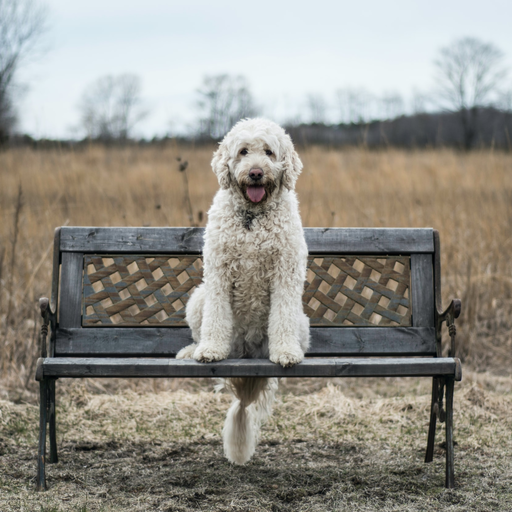

In [ ]:
image = download_image(img_url).resize((512, 512))
image

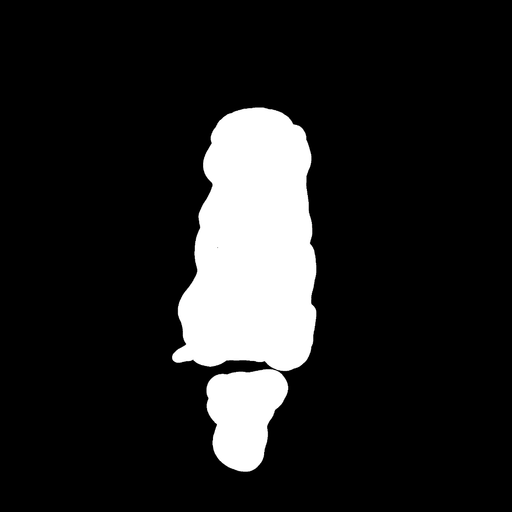

In [ ]:
mask_image = download_image(mask_url).resize((512, 512))
mask_image

In [ ]:
prompt = "a mecha robot sitting on a bench"

guidance_scale = 7.5
num_samples = 3
generator = torch.Generator(device=device).manual_seed(0) # change the seed to get different results

images = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask_image,
    guidance_scale=guidance_scale,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
images.insert(0, image)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from torchvision.utils import make_grid

In [78]:
from PIL import Image

def image_grid(imgs):
  for img in imgs:
    assert(imgs[0].size == img.size)

  cols = 4
  rows = (len(imgs) - 1) // cols + 1

  w = imgs[0].size[0]
  h = imgs[0].size[1]

  box_width = 256
  box_height = int(h/w * box_width)

  grid = Image.new('RGB', size=(cols * box_width, rows * box_height))

  for i, img in enumerate(imgs):
    grid.paste(
        img.resize((box_width, box_height)),
        box=(i % cols * box_width, i // cols * box_height)
    )

  return grid

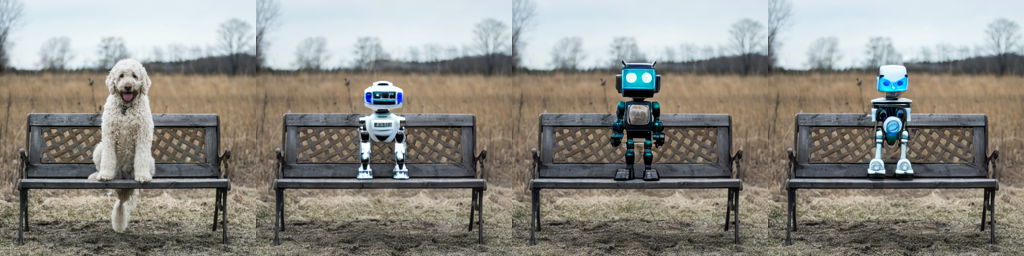

In [79]:
image_grid(images)